See [Sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes).

- The video that inspired this notebook can be found [here](https://www.youtube.com/watch?v=uvMGZb0Suyc).
- Prime factors calculator [here](https://www.calculatorsoup.com/calculators/math/prime-factors.php).

In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

The following function was available [here](https://stackoverflow.com/questions/15347174/python-finding-prime-factors).

In [34]:
def primes(n):
    if n<=2:
        return []
    sieve=[True]*(n+1)
    for x in range(3,int(n**0.5)+1,2):
        for y in range(3,(n//x)+1,2):
            sieve[(x*y)]=False

    return [2]+[i for i in range(3,n,2) if sieve[i]]

In [35]:
def prime_factors(n):
    primes_ = primes(n+1)
    factors = list(filter(lambda p: n % p == 0, primes_))
    return factors

In [36]:
has_repetition = lambda num, facs: num != np.prod(facs)
is_even = lambda x: x % 2 == 0

def mertens_func(n):
    factors = prime_factors(n)

    if has_repetition(n, factors):
        return 0
    if is_even(len(factors)):
        return 1
    
    # Odd num of prime factors, w/o repetition
    return -1

In [37]:
N = 100000

In [38]:
mertens_vals = [mertens_func(n) for n in range(0, N+1)]

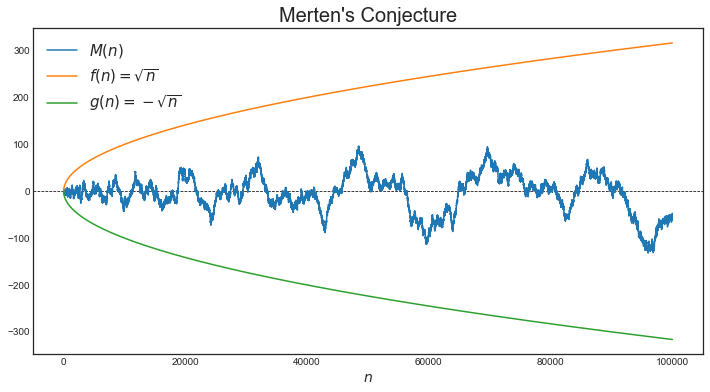

In [39]:
ns = list(range(0, N+1))

fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Merten\'s Conjecture', fontsize=20)

ax.axhline(c='k', ls='dashed', lw=0.75)

ax.plot(ns, np.cumsum(mertens_vals), label='$M(n)$')

ax.plot(ns, np.sqrt(ns), label='$f(n) = \sqrt{n}$')
ax.plot(ns, -np.sqrt(ns), label='$g(n) = -\sqrt{n}$')

ax.set_xlabel('$n$', fontsize=14)

plt.legend(prop={'size': 15})
plt.show()